### Bibliotecas Utilizadas ###
Para o projeto guiado #3, foi necessário importar a lib **pandas** (para a leitura e manipulação do database) e **matplotlib** (para a criação dos gráficos)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
print(f'A versão do numpy é : {np.__version__}')
print(f'A versão do pandas é : {pd.__version__}')

A versão do numpy é : 1.26.0
A versão do pandas é : 2.1.1


### Descrição do Dataset Escolhido
O dataset escolhido foi o *Amazon Kindle Books Dataset 2023 (130K Books)* (Conjunto de Dados 2023 de Livros Kindle da Amazon), disponível na plataforma Kaggle, que reúne dados de 130.000 e-books vendidos pela Amazon em 2023, até o mês de outubro deste mesmo ano. (Disponível em: https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books/data)

In [2]:
df = pd.read_csv('/Users/laismeirelesalves/Estudos/semana_13/kindle_data-v2.csv', sep=',') 
# método read_csv realiza a leitura do dataset para que seja possível acessar os dados que contidos no arquivo.

### Visualizando os dados

In [3]:
df.head() # método que exibe as primeiras linhas da tabela (por definição são exibidas as 5 primeiras 
# linhas da tabela, sendo possível informar outro valor como parâmetro para exibir uma quantidade de linhas 
# diferente)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [42]:
df.info() # Retorna as seguintes informações sobre o dataframe: index, nomes das colunas, quantidade de 
# valores que não são nulos em cada coluna e os tipos dos valores. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [32]:
df.columns # Retorna o nome de cada coluna

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

In [100]:
df_reduzido = df.drop(columns=['asin', 'imgUrl', 'productURL']) # Excluindo colunas desnecessárias para a 
# análise e armazenando em um novo df
df_reduzido.to_csv(path_or_buf='/Users/laismeirelesalves/Estudos/semana_13/on26-python-s13-projeto-guiado-II/material/df_kindle_reduzido.csv')

### Insights e gráficos
O DataBase utilizado reúne informações descritivas sobre os livros no formato e-book Kindle vendidos no ano de 2023 (até outubro). A seguir, mostrarei as perguntas que pude elaborar a partir dos dados e o caminho utilizado para analisá-las.

* Quem são os 10 autores com títulos mais vendidos?
* Os autores com títulos mais vendidos são autores de best-sellers?
* Qual o impacto da assinatura Kindle Unlimited na aquisição de e-books?



**Quantidade de e-books vendidos por autor (considerando os 10 autores com mais e-books vendidos)**

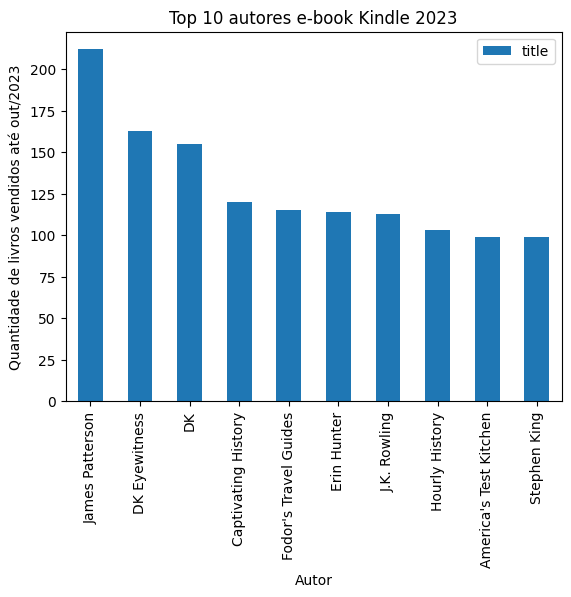

In [98]:
por_autor = df_reduzido.groupby('author')
autores_mais_lidos = por_autor.count().sort_values(by='title',ascending=False).head(10)
autores_mais_lidos.plot(kind='bar', y='title')
plt.xlabel('Autor')
plt.ylabel('Quantidade de livros vendidos até out/2023')
plt.title('Top 10 autores e-book Kindle 2023');